In [1]:
%matplotlib ipympl

In [2]:
import sys
sys.path
sys.path.append(r'C:\Users\meshk\PHY487Project1\PHY487Research\JakeBlackmore-Diatomic-Py-4b2ce31\diatom')
print(sys.path)

['c:\\Users\\meshk\\PHY487Project1\\PHY487Research', 'c:\\Users\\meshk\\anaconda3\\python311.zip', 'c:\\Users\\meshk\\anaconda3\\DLLs', 'c:\\Users\\meshk\\anaconda3\\Lib', 'c:\\Users\\meshk\\anaconda3', '', 'c:\\Users\\meshk\\anaconda3\\Lib\\site-packages', 'c:\\Users\\meshk\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\meshk\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\meshk\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\meshk\\PHY487Project1\\PHY487Research\\JakeBlackmore-Diatomic-Py-4b2ce31\\diatom']


In [3]:
import numpy
import matplotlib.pyplot as pyplot
import hamiltonian as hamiltonian
from constants import Rb87Cs133
from scipy.constants import h
from numpy.linalg import eigh

In [10]:
Nmax=4
H0,Hz,Hdc,Hac = \
    hamiltonian.build_hamiltonians(Nmax,Rb87Cs133,zeeman=True,Edc=True,ac=True)

I = 0 #W/m^2
E = numpy.linspace(0, 5, int(60))*0.005#*1e5 #V/m
B = 0 #T

H = H0[..., None]+\
    Hz[..., None]*B+\
    Hdc[..., None]*E+\
    Hac[..., None]*I 
H = H.transpose(2,0,1)

energies, states = eigh(H)

Text(0.5, 0, 'Electric Field (kV/cm)')

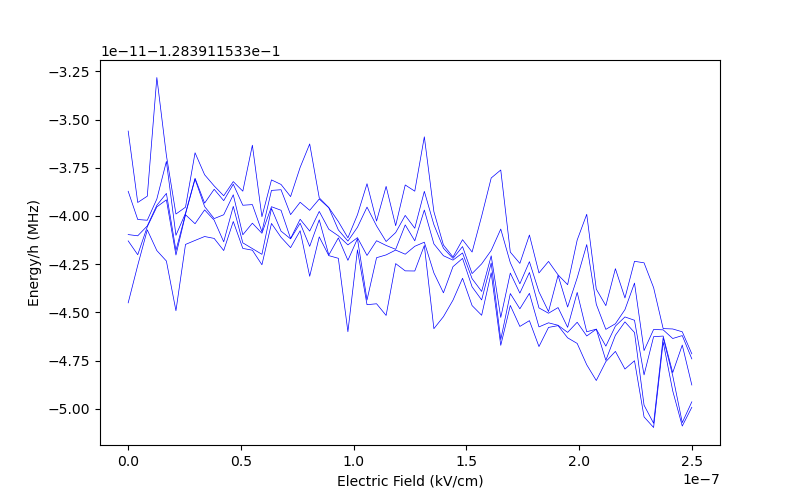

In [11]:
fig, ax = pyplot.subplots(figsize=(8, 5))

ax.plot(E*1e-5, energies[:,:5]*1e-6/h, color='b', linewidth=0.5)
#ax.set_ylim(-4000, 10000)
#ax.set_xlim(0, 5)
ax.set_ylabel("Energy/h (MHz)")
ax.set_xlabel("Electric Field (kV/cm)")

In [6]:
print(len(energies[0]))
print(len(energies))

800
60


In [7]:
energies.shape

(60, 800)